In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True

import seaborn as sns

In [2]:
palette = sns.color_palette('viridis', n_colors=8)
palette
print(palette.as_hex())

['#482878', '#3e4989', '#31688e', '#26828e', '#1f9e89', '#35b779', '#6ece58', '#b5de2b']


In [3]:
palette_2 = sns.color_palette('rocket', n_colors=3)
palette_2
print(palette_2.as_hex())

['#611f53', '#cb1b4f', '#f58860']


In [4]:
def modelLV(Y, t, a0, a1, a2, a3, a4, a5, a6, a7, a8, a9):
    X1, X2, X3 = Y
    
    dX1 = a0*X1 - a1*X1 - a2*X1*X2 + a3*X1*X3
    dX2 = a4*X1*X2 - a5*X2 - a6*X2*X3
    dX3 = -a7*X1*X3 + a8*X2*X3 - a9*X3
    
    return [dX1, dX2, dX3]

In [5]:
names=['$a_0$', '$a_1$', '$a_2$', '$a_3$', '$a_4$', '$a_5$', '$a_6$', '$a_7$', '$a_8$', '$a_9$']

In [6]:
parNames=['$a_0$', '$a_1$', '$a_2$', '$a_3$', '$a_4$', '$a_5$', '$a_6$', '$a_7$', '$a_8$', '$a_9$', 'RMSE']

In [7]:
def simulations(dfParams, Y0, t):
    X1 = []
    X2 = []
    X3 = []
    
    for i in range(dfParams.shape[0]):
        a0 = dfParams['$a_0$'][i]
        a1 = dfParams['$a_1$'][i]
        a2 = dfParams['$a_2$'][i]
        a3 = dfParams['$a_3$'][i]
        a4 = dfParams['$a_4$'][i]
        a5 = dfParams['$a_5$'][i]
        a6 = dfParams['$a_6$'][i]
        a7 = dfParams['$a_7$'][i]
        a8 = dfParams['$a_8$'][i]
        a9 = dfParams['$a_9$'][i]
    
        sol = odeint(modelLV, Y0, t, args=(a0, a1, a2, a3, a4, a5, a6, a7, a8, a9))
        X1.append(sol[:,0])
        X2.append(sol[:,1])
        X3.append(sol[:,2])

    return [X1, X2, X3]

# Lotka-Volterra equations (Linear model)

\begin{align}
\dot X_1 &= a_0 X_1 - a_2 X_1 X_2 \\
\dot X_2 &= a_4 X_1 X_2 - a_5 X_2 - a_6 X_2 X_3 \\
\dot X_3 &= a_8 X_2 X_3 - a_9 X_3 \\
\end{align}

In [8]:
a0 = 0.14 # Reproduction rate of X1
a1 = 0.0 # Mortality rate of X1
a2 = 0.16 # Rate of predation of X2 on X1
a3 = 0.0 # Reproduction rate of X1 in presence of X3
a4 = 0.15 # Reproduction rate of X2 in presence of X1
a5 = 0.11 # Mortality rate of X2
a6 = 0.05 # Rate of predation of X3 on X2
a7 = 0.0 # Rate of predation of X1 on X3
a8 = 0.06 # Reproduction rate of X3 in presence of X2
a9 = 0.05 # Mortality rate of X3

In [9]:
dfGroundPars = pd.DataFrame([a0, a1, a2, a3, a4, a5, a6, a7, a8, a9]).T
dfGroundPars.columns = names

In [10]:
dfGroundPars

,$a_0$,$a_1$,$a_2$,$a_3$,$a_4$,$a_5$,$a_6$,$a_7$,$a_8$,$a_9$
0,0.14,0.0,0.16,0.0,0.15,0.11,0.05,0.0,0.06,0.05


# Generating data

In [11]:
a0 = dfGroundPars['$a_0$'][0]
a1 = dfGroundPars['$a_1$'][0]
a2 = dfGroundPars['$a_2$'][0]
a3 = dfGroundPars['$a_3$'][0]
a4 = dfGroundPars['$a_4$'][0]
a5 = dfGroundPars['$a_5$'][0]
a6 = dfGroundPars['$a_6$'][0]
a7 = dfGroundPars['$a_7$'][0]
a8 = dfGroundPars['$a_8$'][0]
a9 = dfGroundPars['$a_9$'][0]

In [12]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)
dt = t[1]-t[0]

In [13]:
sol = odeint(modelLV, Y0, t, args=(a0, a1, a2, a3, a4, a5, a6, a7, a8, a9))

In [14]:
X1_g = sol[:,0]
X2_g = sol[:,1]
X3_g = sol[:,2]

# Recovering parameters

In [15]:
dfParams_ground = dfGroundPars.drop(columns=['$a_1$', '$a_3$', '$a_7$']).melt(var_name='Parameters', value_name='Values')

In [16]:
dfData = pd.read_csv('linear/LVdata_noise.data', sep=' ')

## Quantitative X1

In [17]:
dfParams = pd.read_csv('linear/bestPars_quant.dat', sep=' ', names=parNames)

In [18]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)

X1_I, X2_I, X3_I = simulations(dfParams, Y0, t)

In [19]:
dfParams_quant = dfParams.drop(columns=['$a_1$', '$a_3$', '$a_7$', 'RMSE']).melt(var_name='Parameters', value_name='Values')

### Likelihood profiles

In [20]:
df_a0 = pd.read_csv('linear/profilesData/a0Profile.dat', sep=' ', names=parNames).filter(['$a_0$', 'RMSE'])
df_a2 = pd.read_csv('linear/profilesData/a2Profile.dat', sep=' ', names=parNames).filter(['$a_2$', 'RMSE'])
df_a4 = pd.read_csv('linear/profilesData/a4Profile.dat', sep=' ', names=parNames).filter(['$a_4$', 'RMSE'])
df_a5 = pd.read_csv('linear/profilesData/a5Profile.dat', sep=' ', names=parNames).filter(['$a_5$', 'RMSE'])
df_a6 = pd.read_csv('linear/profilesData/a6Profile.dat', sep=' ', names=parNames).filter(['$a_6$', 'RMSE'])
df_a8 = pd.read_csv('linear/profilesData/a8Profile.dat', sep=' ', names=parNames).filter(['$a_8$', 'RMSE'])
df_a9 = pd.read_csv('linear/profilesData/a9Profile.dat', sep=' ', names=parNames).filter(['$a_9$', 'RMSE'])

In [21]:
df_a0_quant = df_a0
df_a2_quant = df_a2
df_a4_quant = df_a4
df_a5_quant = df_a5
df_a6_quant = df_a6
df_a8_quant = df_a8
df_a9_quant = df_a9

## Qualitative X2

In [22]:
dfQual_x2 = pd.read_csv('linear/LVdata_qual_x2.data', sep=' ')

In [23]:
dfParams = pd.read_csv('linear/bestPars_x2.dat', sep=' ', names=parNames)

In [24]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)

X1_II, X2_II, X3_II = simulations(dfParams, Y0, t)

In [25]:
dfParams_x2 = dfParams.drop(columns=['$a_1$', '$a_3$', '$a_7$', 'RMSE']).melt(var_name='Parameters', value_name='Values')

### Likelihood profiles

In [26]:
df_a0 = pd.read_csv('linear/profilesData/a0Profile_x2.dat', sep=' ', names=parNames).filter(['$a_0$', 'RMSE'])
df_a2 = pd.read_csv('linear/profilesData/a2Profile_x2.dat', sep=' ', names=parNames).filter(['$a_2$', 'RMSE'])
df_a4 = pd.read_csv('linear/profilesData/a4Profile_x2.dat', sep=' ', names=parNames).filter(['$a_4$', 'RMSE'])
df_a5 = pd.read_csv('linear/profilesData/a5Profile_x2.dat', sep=' ', names=parNames).filter(['$a_5$', 'RMSE'])
df_a6 = pd.read_csv('linear/profilesData/a6Profile_x2.dat', sep=' ', names=parNames).filter(['$a_6$', 'RMSE'])
df_a8 = pd.read_csv('linear/profilesData/a8Profile_x2.dat', sep=' ', names=parNames).filter(['$a_8$', 'RMSE'])
df_a9 = pd.read_csv('linear/profilesData/a9Profile_x2.dat', sep=' ', names=parNames).filter(['$a_9$', 'RMSE'])

In [27]:
df_a0_x2 = df_a0
df_a2_x2 = df_a2
df_a4_x2 = df_a4
df_a5_x2 = df_a5
df_a6_x2 = df_a6
df_a8_x2 = df_a8
df_a9_x2 = df_a9

## Qualitative X3

In [28]:
dfQual_x3 = pd.read_csv('linear/LVdata_qual_x3.data', sep=' ')

In [29]:
dfParams = pd.read_csv('linear/bestPars_x3.dat', sep=' ', names=parNames)

In [30]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)

X1_III, X2_III, X3_III = simulations(dfParams, Y0, t)

In [31]:
dfParams_x3 = dfParams.drop(columns=['$a_1$', '$a_3$', '$a_7$', 'RMSE']).melt(var_name='Parameters', value_name='Values')

### Likelihood profiles

In [32]:
df_a0 = pd.read_csv('linear/profilesData/a0Profile_x3.dat', sep=' ', names=parNames).filter(['$a_0$', 'RMSE'])
df_a2 = pd.read_csv('linear/profilesData/a2Profile_x3.dat', sep=' ', names=parNames).filter(['$a_2$', 'RMSE'])
df_a4 = pd.read_csv('linear/profilesData/a4Profile_x3.dat', sep=' ', names=parNames).filter(['$a_4$', 'RMSE'])
df_a5 = pd.read_csv('linear/profilesData/a5Profile_x3.dat', sep=' ', names=parNames).filter(['$a_5$', 'RMSE'])
df_a6 = pd.read_csv('linear/profilesData/a6Profile_x3.dat', sep=' ', names=parNames).filter(['$a_6$', 'RMSE'])
df_a8 = pd.read_csv('linear/profilesData/a8Profile_x3.dat', sep=' ', names=parNames).filter(['$a_8$', 'RMSE'])
df_a9 = pd.read_csv('linear/profilesData/a9Profile_x3.dat', sep=' ', names=parNames).filter(['$a_9$', 'RMSE'])

In [33]:
df_a0_x3 = df_a0
df_a2_x3 = df_a2
df_a4_x3 = df_a4
df_a5_x3 = df_a5
df_a6_x3 = df_a6
df_a8_x3 = df_a8
df_a9_x3 = df_a9

## Qualitative X2 and X3

In [34]:
dfParams = pd.read_csv('linear/bestPars_x2x3.dat', sep=' ', names=parNames)

In [35]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)

X1_IV, X2_IV, X3_IV = simulations(dfParams, Y0, t)

In [36]:
dfParams_x2x3 = dfParams.drop(columns=['$a_1$', '$a_3$', '$a_7$', 'RMSE']).melt(var_name='Parameters', value_name='Values')

### Likelihood profiles

In [37]:
df_a0 = pd.read_csv('linear/profilesData/a0Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_0$', 'RMSE'])
df_a2 = pd.read_csv('linear/profilesData/a2Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_2$', 'RMSE'])
df_a4 = pd.read_csv('linear/profilesData/a4Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_4$', 'RMSE'])
df_a5 = pd.read_csv('linear/profilesData/a5Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_5$', 'RMSE'])
df_a6 = pd.read_csv('linear/profilesData/a6Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_6$', 'RMSE'])
df_a8 = pd.read_csv('linear/profilesData/a8Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_8$', 'RMSE'])
df_a9 = pd.read_csv('linear/profilesData/a9Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_9$', 'RMSE'])

In [38]:
df_a0_x2x3 = df_a0
df_a2_x2x3 = df_a2
df_a4_x2x3 = df_a4
df_a5_x2x3 = df_a5
df_a6_x2x3 = df_a6
df_a8_x2x3 = df_a8
df_a9_x2x3 = df_a9

## Comparative

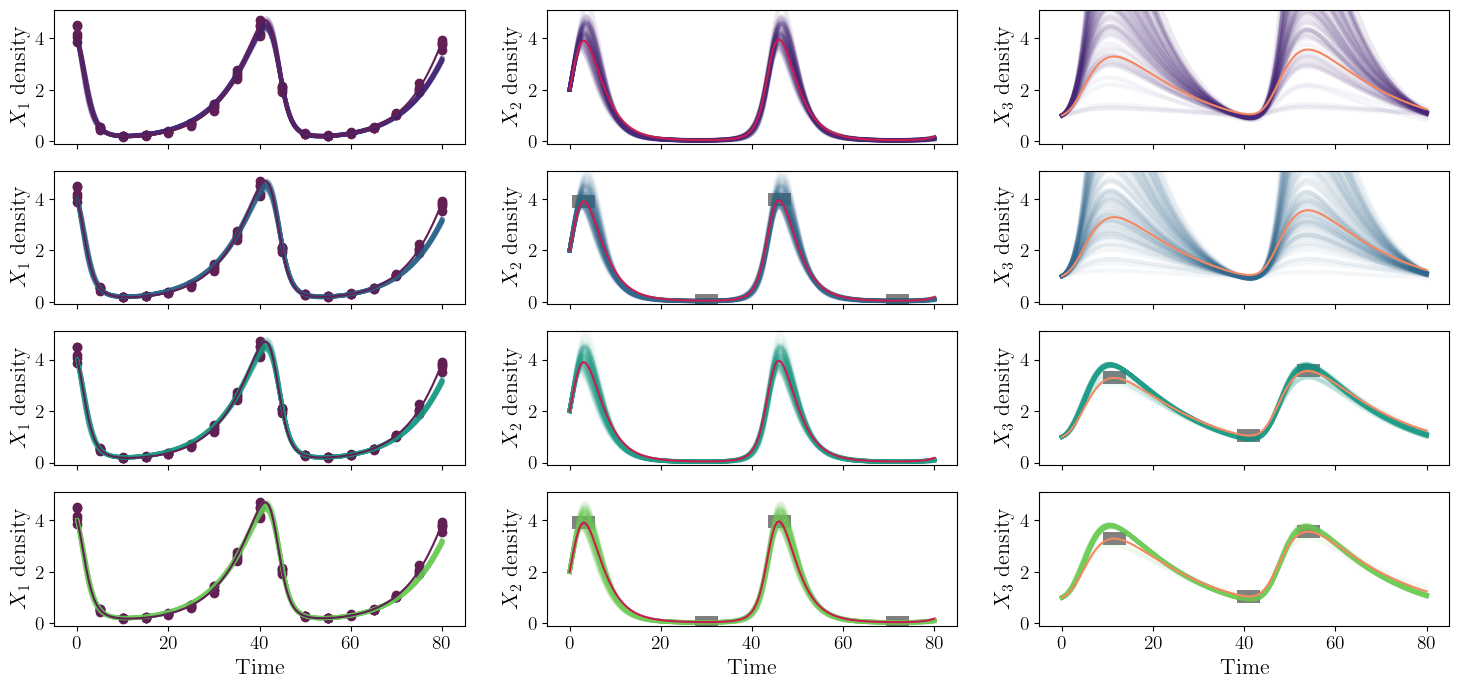

In [39]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(18,8), sharex=True)

# for i in range(dfParams.shape[0]):
for i in range(100):
    axs[0,0].plot(t, X1_I[i], lw=3, color=palette[0], alpha=0.05)
    axs[0,1].plot(t, X2_I[i], lw=3, color=palette[0], alpha=0.05)
    axs[0,2].plot(t, X3_I[i], lw=3, color=palette[0], alpha=0.05)

# for i in range(dfParams.shape[0]):
for i in range(100):
    axs[1,0].plot(t, X1_II[i], lw=3, color=palette[2], alpha=0.05)
    axs[1,1].plot(t, X2_II[i], lw=3, color=palette[2], alpha=0.05)
    axs[1,2].plot(t, X3_II[i], lw=3, color=palette[2], alpha=0.05)

# for i in range(dfParams.shape[0]):
for i in range(100):
    axs[2,0].plot(t, X1_III[i], lw=3, color=palette[4], alpha=0.05)
    axs[2,1].plot(t, X2_III[i], lw=3, color=palette[4], alpha=0.05)
    axs[2,2].plot(t, X3_III[i], lw=3, color=palette[4], alpha=0.05)

# for i in range(dfParams.shape[0]):
for i in range(100):
    axs[3,0].plot(t, X1_IV[i], lw=3, color=palette[6], alpha=0.05)
    axs[3,1].plot(t, X2_IV[i], lw=3, color=palette[6], alpha=0.05)
    axs[3,2].plot(t, X3_IV[i], lw=3, color=palette[6], alpha=0.05)

axs[0,0].scatter(x=dfData['Time'], y=dfData['X1'], color=palette_2[0])
axs[1,0].scatter(x=dfData['Time'], y=dfData['X1'], color=palette_2[0])
axs[2,0].scatter(x=dfData['Time'], y=dfData['X1'], color=palette_2[0])
axs[3,0].scatter(x=dfData['Time'], y=dfData['X1'], color=palette_2[0])

timeWindow = 5
valueWindow = 0.5

for i in range(len(dfQual_x2['Time'])):
    rect = plt.Rectangle((dfQual_x2['Time'].values[i]- timeWindow/2, dfQual_x2['X2'].values[i] - valueWindow/2),
                         timeWindow, valueWindow, fc='gray')
    axs[1,1].add_patch(rect)
    rect1 = plt.Rectangle((dfQual_x2['Time'].values[i]- timeWindow/2, dfQual_x2['X2'].values[i] - valueWindow/2),
                         timeWindow, valueWindow, fc='gray')
    axs[3,1].add_patch(rect1)
    
for i in range(len(dfQual_x3['Time'])):
    rect = plt.Rectangle((dfQual_x3['Time'].values[i]- timeWindow/2, dfQual_x3['X3'].values[i] - valueWindow/2),
                         timeWindow, valueWindow, fc='gray')
    axs[2,2].add_patch(rect)
    rect1 = plt.Rectangle((dfQual_x3['Time'].values[i]- timeWindow/2, dfQual_x3['X3'].values[i] - valueWindow/2),
                         timeWindow, valueWindow, fc='gray')
    axs[3,2].add_patch(rect1)

axs[0,0].plot(t, X1_g, lw=1.5, color=palette_2[0])
axs[0,1].plot(t, X2_g, lw=1.5, color=palette_2[1])
axs[0,2].plot(t, X3_g, lw=1.5, color=palette_2[2])

axs[1,0].plot(t, X1_g, lw=1.5, color=palette_2[0])
axs[1,1].plot(t, X2_g, lw=1.5, color=palette_2[1])
axs[1,2].plot(t, X3_g, lw=1.5, color=palette_2[2])

axs[2,0].plot(t, X1_g, lw=1.5, color=palette_2[0])
axs[2,1].plot(t, X2_g, lw=1.5, color=palette_2[1])
axs[2,2].plot(t, X3_g, lw=1.5, color=palette_2[2])

axs[3,0].plot(t, X1_g, lw=1.5, color=palette_2[0])
axs[3,1].plot(t, X2_g, lw=1.5, color=palette_2[1])
axs[3,2].plot(t, X3_g, lw=1.5, color=palette_2[2])

axs[0,0].set_ylabel('$X_1$ density')
axs[0,1].set_ylabel('$X_2$ density')
axs[0,2].set_ylabel('$X_3$ density')

axs[1,0].set_ylabel('$X_1$ density')
axs[1,1].set_ylabel('$X_2$ density')
axs[1,2].set_ylabel('$X_3$ density')

axs[2,0].set_ylabel('$X_1$ density')
axs[2,1].set_ylabel('$X_2$ density')
axs[2,2].set_ylabel('$X_3$ density')

axs[3,0].set_ylabel('$X_1$ density')
axs[3,1].set_ylabel('$X_2$ density')
axs[3,2].set_ylabel('$X_3$ density')

axs[3,0].set_xlabel('Time')
axs[3,1].set_xlabel('Time')
axs[3,2].set_xlabel('Time')

plt.setp(axs, xlim=(-5,85), ylim=(-0.1,5.1))

plt.savefig("linearLV_graphs.svg", transparent=True)

plt.show()

In [40]:
dfParams_quant['Strategy'] = 'I'
dfParams_x2['Strategy'] = 'II'
dfParams_x3['Strategy'] = 'III'
dfParams_x2x3['Strategy'] = 'IV'

In [41]:
dfParams_all = pd.concat([dfParams_quant, dfParams_x2, dfParams_x3, dfParams_x2x3])
dfParams_all_linear = dfParams_all.copy()

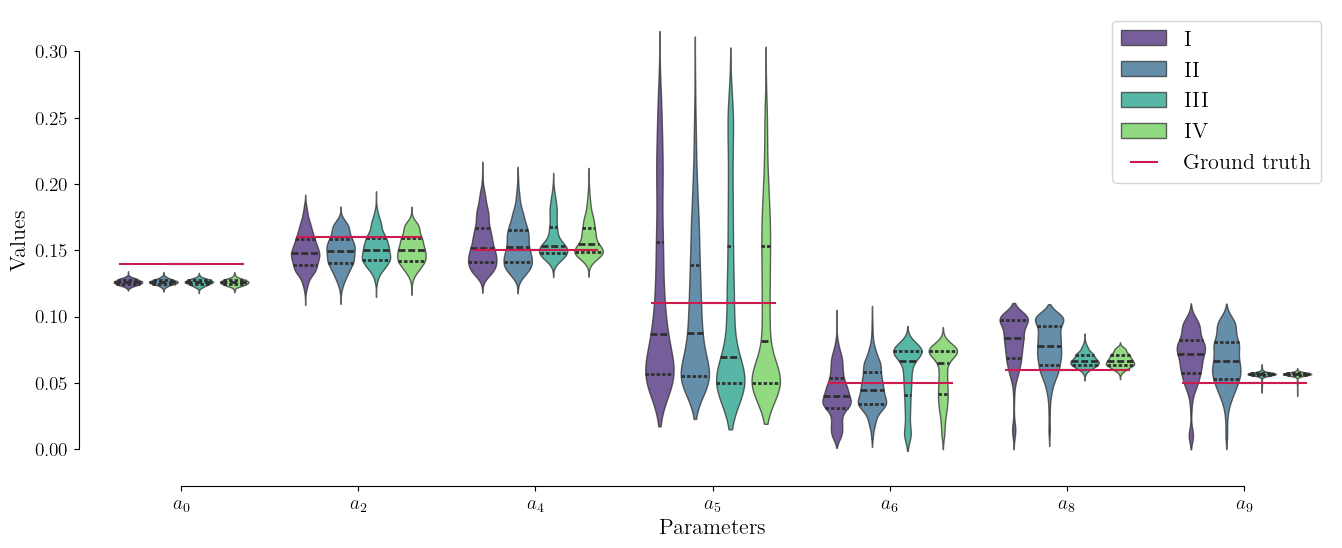

In [42]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(16,6))

colors = [palette[0], palette[2], palette[4], palette[6]]

sns.violinplot(data=dfParams_all, x='Parameters', y='Values', hue='Strategy',
               palette=colors, alpha=0.75, linewidth=1, density_norm="count", gap=0.2,
               inner="quart", saturation=1, inner_kws=dict(linewidth=2))

sns.pointplot(data=dfParams_ground, x='Parameters', y='Values', label='Ground truth',
              color=palette_2[1], linestyle="none", marker="_", markersize=20, markeredgewidth=1.5)

sns.pointplot(data=dfParams_ground, x='Parameters', y='Values', #label='Ground truth',
              color=palette_2[1], linestyle="none", marker="_", markersize=90, markeredgewidth=1.5)

sns.despine(offset=10, trim=True);

plt.savefig("linearLV_boots.svg", transparent=True)

# plt.setp(axs, ylim=(-0.01,0.61))

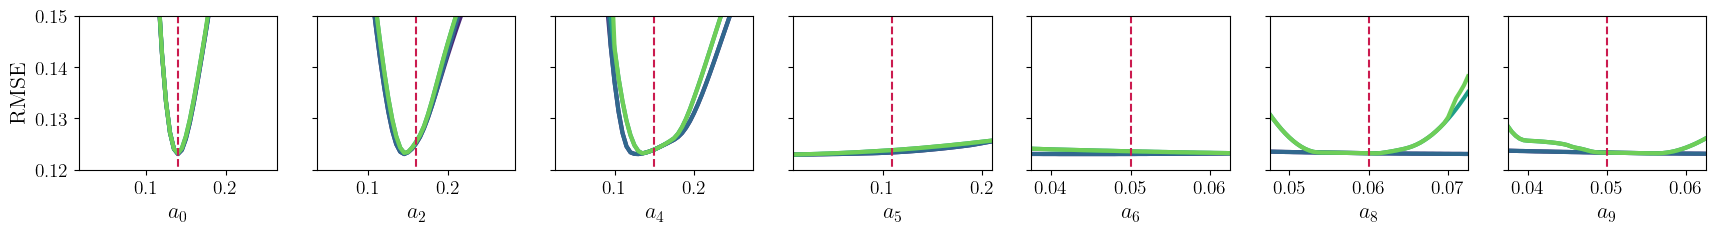

In [43]:
fig, axs = plt.subplots(nrows=1, ncols=7, figsize=(21,2), sharey=True, facecolor='white')
# fig, axs = plt.subplots(nrows=1, ncols=7, figsize=(36,4), facecolor='white')

axs[0].plot(df_a0_quant['$a_0$'], df_a0_quant['RMSE'], lw=3, color=palette[0])
axs[0].plot(df_a0_x2['$a_0$'], df_a0_x2['RMSE'], lw=3, color=palette[2])
axs[0].plot(df_a0_x3['$a_0$'], df_a0_x3['RMSE'], lw=3, color=palette[4])
axs[0].plot(df_a0_x2x3['$a_0$'], df_a0_x2x3['RMSE'], lw=3, color=palette[6])
axs[0].vlines(dfGroundPars['$a_0$'], ymin=0.0, ymax=1.0, colors=palette_2[1], linestyles='dashed')
axs[0].set_xlabel('$a_0$')
axs[0].set_ylabel('RMSE')
axs[0].set_xlim((0.015,0.265))

axs[1].plot(df_a2_quant['$a_2$'], df_a2_quant['RMSE'], lw=3, color=palette[0])
axs[1].plot(df_a2_x2['$a_2$'], df_a2_x2['RMSE'], lw=3, color=palette[2])
axs[1].plot(df_a2_x3['$a_2$'], df_a2_x3['RMSE'], lw=3, color=palette[4])
axs[1].plot(df_a2_x2x3['$a_2$'], df_a2_x2x3['RMSE'], lw=3, color=palette[6])
axs[1].vlines(dfGroundPars['$a_2$'], ymin=0.0, ymax=1.0, colors=palette_2[1], linestyles='dashed')
axs[1].set_xlabel('$a_2$')
axs[1].set_xlim((0.035,0.285))

axs[2].plot(df_a4_quant['$a_4$'], df_a4_quant['RMSE'], lw=3, color=palette[0])
axs[2].plot(df_a4_x2['$a_4$'], df_a4_x2['RMSE'], lw=3, color=palette[2])
axs[2].plot(df_a4_x3['$a_4$'], df_a4_x3['RMSE'], lw=3, color=palette[4])
axs[2].plot(df_a4_x2x3['$a_4$'], df_a4_x2x3['RMSE'], lw=3, color=palette[6])
axs[2].vlines(dfGroundPars['$a_4$'], ymin=0.0, ymax=1.0, colors=palette_2[1], linestyles='dashed')
axs[2].set_xlabel('$a_4$')
axs[2].set_xlim((0.025,0.275))

axs[3].plot(df_a5_quant['$a_5$'], df_a5_quant['RMSE'], lw=3, color=palette[0])
axs[3].plot(df_a5_x2['$a_5$'], df_a5_x2['RMSE'], lw=3, color=palette[2])
axs[3].plot(df_a5_x3['$a_5$'], df_a5_x3['RMSE'], lw=3, color=palette[4])
axs[3].plot(df_a5_x2x3['$a_5$'], df_a5_x2x3['RMSE'], lw=3, color=palette[6])
axs[3].vlines(dfGroundPars['$a_5$'], ymin=0.0, ymax=1.0, colors=palette_2[1], linestyles='dashed')
axs[3].set_xlabel('$a_5$')
axs[3].set_xlim((0.010,0.210))

axs[4].plot(df_a6_quant['$a_6$'], df_a6_quant['RMSE'], lw=3, color=palette[0])
axs[4].plot(df_a6_x2['$a_6$'], df_a6_x2['RMSE'], lw=3, color=palette[2])
axs[4].plot(df_a6_x3['$a_6$'], df_a6_x3['RMSE'], lw=3, color=palette[4])
axs[4].plot(df_a6_x2x3['$a_6$'], df_a6_x2x3['RMSE'], lw=3, color=palette[6])
axs[4].vlines(dfGroundPars['$a_6$'], ymin=0.0, ymax=1.0, colors=palette_2[1], linestyles='dashed')
axs[4].set_xlabel('$a_6$')
axs[4].set_xlim((0.0375,0.0625))

axs[5].plot(df_a8_quant['$a_8$'], df_a8_quant['RMSE'], lw=3, color=palette[0])
axs[5].plot(df_a8_x2['$a_8$'], df_a8_x2['RMSE'], lw=3, color=palette[2])
axs[5].plot(df_a8_x3['$a_8$'], df_a8_x3['RMSE'], lw=3, color=palette[4])
axs[5].plot(df_a8_x2x3['$a_8$'], df_a8_x2x3['RMSE'], lw=3, color=palette[6])
axs[5].vlines(dfGroundPars['$a_8$'], ymin=0.0, ymax=1.0, colors=palette_2[1], linestyles='dashed')
axs[5].set_xlabel('$a_8$')
axs[5].set_xlim((0.0475,0.0725))

axs[6].plot(df_a9_quant['$a_9$'], df_a9_quant['RMSE'], lw=3, color=palette[0])
axs[6].plot(df_a9_x2['$a_9$'], df_a9_x2['RMSE'], lw=3, color=palette[2])
axs[6].plot(df_a9_x3['$a_9$'], df_a9_x3['RMSE'], lw=3, color=palette[4])
axs[6].plot(df_a9_x2x3['$a_9$'], df_a9_x2x3['RMSE'], lw=3, color=palette[6])
axs[6].vlines(dfGroundPars['$a_9$'], ymin=0.0, ymax=1.0, colors=palette_2[1], linestyles='dashed')
axs[6].set_xlabel('$a_9$')
axs[6].set_xlim((0.0375,0.0625))

plt.setp(axs, ylim=(0.12,0.15))

plt.savefig("linearLV_like.svg", transparent=True)

plt.show()

# Lotka-Volterra (Cycle model)

\begin{align}
\dot X_1 &= - a_1 X_1 - a_2 X_1 X_2 + a_3 X_1 X_3 \\
\dot X_2 &= a_4 X_1 X_2 - a_5 X_2 - a_6 X_2 X_3 \\
\dot X_3 &= -a_7 X_1 X_3 + a_8 X_2 X_3 - a_9 X_3 \\
\end{align}

In [8]:
a0 = 0.0 # Reproduction rate of X1
a1 = 0.18 # Mortality rate of X1
a2 = 0.16 # Rate of predation of X2 on X1
a3 = 0.15 # Reproduction rate of X1 in presence of X3
a4 = 0.11 # Reproduction rate of X2 in presence of X1
a5 = 0.02 # Mortality rate of X2
a6 = 0.12 # Rate of predation of X3 on X2
a7 = 0.04 # Rate of predation of X1 on X3
a8 = 0.12 # Reproduction rate of X3 in presence of X2
a9 = 0.02 # Mortality rate of X3

In [9]:
dfGroundPars = pd.DataFrame([a0, a1, a2, a3, a4, a5, a6, a7, a8, a9]).T
dfGroundPars.columns = names

In [10]:
dfGroundPars

,$a_0$,$a_1$,$a_2$,$a_3$,$a_4$,$a_5$,$a_6$,$a_7$,$a_8$,$a_9$
0,0.0,0.18,0.16,0.15,0.11,0.02,0.12,0.04,0.12,0.02


# Generating data

In [11]:
a0 = dfGroundPars['$a_0$'][0]
a1 = dfGroundPars['$a_1$'][0]
a2 = dfGroundPars['$a_2$'][0]
a3 = dfGroundPars['$a_3$'][0]
a4 = dfGroundPars['$a_4$'][0]
a5 = dfGroundPars['$a_5$'][0]
a6 = dfGroundPars['$a_6$'][0]
a7 = dfGroundPars['$a_7$'][0]
a8 = dfGroundPars['$a_8$'][0]
a9 = dfGroundPars['$a_9$'][0]

In [12]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)
dt = t[1]-t[0]

In [13]:
sol = odeint(modelLV, Y0, t, args=(a0, a1, a2, a3, a4, a5, a6, a7, a8, a9))

In [14]:
X1_g = sol[:,0]
X2_g = sol[:,1]
X3_g = sol[:,2]

# Recovering parameters

In [15]:
dfParams_ground = dfGroundPars.drop(columns=['$a_0$']).melt(var_name='Parameters', value_name='Values')

In [16]:
dfData = pd.read_csv('cycle/LVdata_noise.data', sep=' ')

## Quantitative X1

In [17]:
dfParams = pd.read_csv('cycle/bestPars_quant.dat', sep=' ', names=parNames)

In [18]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)

X1_I, X2_I, X3_I = simulations(dfParams, Y0, t)

In [19]:
dfParams_quant = dfParams.drop(columns=['$a_0$', 'RMSE']).melt(var_name='Parameters', value_name='Values')

### Likelihood profiles

In [20]:
df_a1 = pd.read_csv('cycle/profilesData/a1Profile.dat', sep=' ', names=parNames).filter(['$a_1$', 'RMSE'])
df_a2 = pd.read_csv('cycle/profilesData/a2Profile.dat', sep=' ', names=parNames).filter(['$a_2$', 'RMSE'])
df_a3 = pd.read_csv('cycle/profilesData/a3Profile.dat', sep=' ', names=parNames).filter(['$a_3$', 'RMSE'])
df_a4 = pd.read_csv('cycle/profilesData/a4Profile.dat', sep=' ', names=parNames).filter(['$a_4$', 'RMSE'])
df_a5 = pd.read_csv('cycle/profilesData/a5Profile.dat', sep=' ', names=parNames).filter(['$a_5$', 'RMSE'])
df_a6 = pd.read_csv('cycle/profilesData/a6Profile.dat', sep=' ', names=parNames).filter(['$a_6$', 'RMSE'])
df_a7 = pd.read_csv('cycle/profilesData/a7Profile.dat', sep=' ', names=parNames).filter(['$a_7$', 'RMSE'])
df_a8 = pd.read_csv('cycle/profilesData/a8Profile.dat', sep=' ', names=parNames).filter(['$a_8$', 'RMSE'])
df_a9 = pd.read_csv('cycle/profilesData/a9Profile.dat', sep=' ', names=parNames).filter(['$a_9$', 'RMSE'])

In [21]:
df_a1_quant = df_a1
df_a2_quant = df_a2
df_a3_quant = df_a3
df_a4_quant = df_a4
df_a5_quant = df_a5
df_a6_quant = df_a6
df_a7_quant = df_a7
df_a8_quant = df_a8
df_a9_quant = df_a9

## Qualitative X2

In [70]:
dfQual_x2 = pd.read_csv('cycle/LVdata_qual_x2.data', sep=' ')

In [23]:
dfParams = pd.read_csv('cycle/bestPars_x2.dat', sep=' ', names=parNames)

In [24]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)

X1_II, X2_II, X3_II = simulations(dfParams, Y0, t)

In [25]:
dfParams_x2 = dfParams.drop(columns=['$a_0$', 'RMSE']).melt(var_name='Parameters', value_name='Values')

### Likelihood profiles

In [26]:
df_a1 = pd.read_csv('cycle/profilesData/a1Profile_x2.dat', sep=' ', names=parNames).filter(['$a_1$', 'RMSE'])
df_a2 = pd.read_csv('cycle/profilesData/a2Profile_x2.dat', sep=' ', names=parNames).filter(['$a_2$', 'RMSE'])
df_a3 = pd.read_csv('cycle/profilesData/a3Profile_x2.dat', sep=' ', names=parNames).filter(['$a_3$', 'RMSE'])
df_a4 = pd.read_csv('cycle/profilesData/a4Profile_x2.dat', sep=' ', names=parNames).filter(['$a_4$', 'RMSE'])
df_a5 = pd.read_csv('cycle/profilesData/a5Profile_x2.dat', sep=' ', names=parNames).filter(['$a_5$', 'RMSE'])
df_a6 = pd.read_csv('cycle/profilesData/a6Profile_x2.dat', sep=' ', names=parNames).filter(['$a_6$', 'RMSE'])
df_a7 = pd.read_csv('cycle/profilesData/a7Profile_x2.dat', sep=' ', names=parNames).filter(['$a_7$', 'RMSE'])
df_a8 = pd.read_csv('cycle/profilesData/a8Profile_x2.dat', sep=' ', names=parNames).filter(['$a_8$', 'RMSE'])
df_a9 = pd.read_csv('cycle/profilesData/a9Profile_x2.dat', sep=' ', names=parNames).filter(['$a_9$', 'RMSE'])

In [27]:
df_a1_x2 = df_a1
df_a2_x2 = df_a2
df_a3_x2 = df_a3
df_a4_x2 = df_a4
df_a5_x2 = df_a5
df_a6_x2 = df_a6
df_a7_x2 = df_a7
df_a8_x2 = df_a8
df_a9_x2 = df_a9

## Qualitative X3

In [47]:
dfQual_x3 = pd.read_csv('cycle/LVdata_qual_x3.data', sep=' ')

In [48]:
dfParams = pd.read_csv('cycle/bestPars_x3.dat', sep=' ', names=parNames)
# dfParams = pd.read_csv('tmp_x3/bestPars.dat', sep=' ', names=parNames)

In [49]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)

X1_III, X2_III, X3_III = simulations(dfParams, Y0, t)

In [50]:
dfParams_x3 = dfParams.drop(columns=['$a_0$', 'RMSE']).melt(var_name='Parameters', value_name='Values')

### Likelihood profiles

In [51]:
df_a1 = pd.read_csv('cycle/profilesData/a1Profile_x3.dat', sep=' ', names=parNames).filter(['$a_1$', 'RMSE'])
df_a2 = pd.read_csv('cycle/profilesData/a2Profile_x3.dat', sep=' ', names=parNames).filter(['$a_2$', 'RMSE'])
df_a3 = pd.read_csv('cycle/profilesData/a3Profile_x3.dat', sep=' ', names=parNames).filter(['$a_3$', 'RMSE'])
df_a4 = pd.read_csv('cycle/profilesData/a4Profile_x3.dat', sep=' ', names=parNames).filter(['$a_4$', 'RMSE'])
df_a5 = pd.read_csv('cycle/profilesData/a5Profile_x3.dat', sep=' ', names=parNames).filter(['$a_5$', 'RMSE'])
df_a6 = pd.read_csv('cycle/profilesData/a6Profile_x3.dat', sep=' ', names=parNames).filter(['$a_6$', 'RMSE'])
df_a7 = pd.read_csv('cycle/profilesData/a7Profile_x3.dat', sep=' ', names=parNames).filter(['$a_7$', 'RMSE'])
df_a8 = pd.read_csv('cycle/profilesData/a8Profile_x3.dat', sep=' ', names=parNames).filter(['$a_8$', 'RMSE'])
df_a9 = pd.read_csv('cycle/profilesData/a9Profile_x3.dat', sep=' ', names=parNames).filter(['$a_9$', 'RMSE'])

In [52]:
df_a1_x3 = df_a1
df_a2_x3 = df_a2
df_a3_x3 = df_a3
df_a4_x3 = df_a4
df_a5_x3 = df_a5
df_a6_x3 = df_a6
df_a7_x3 = df_a7
df_a8_x3 = df_a8
df_a9_x3 = df_a9

## Qualitative X2 and X3

In [76]:
# dfParams = pd.read_csv('cycle/bestPars_x2x3.dat', sep=' ', names=parNames)
dfParams = pd.read_csv('tmp_x2x3/bestPars.dat', sep=' ', names=parNames)

In [77]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)

X1_IV, X2_IV, X3_IV = simulations(dfParams, Y0, t)

In [78]:
dfParams_x2x3 = dfParams.drop(columns=['$a_0$', 'RMSE']).melt(var_name='Parameters', value_name='Values')

### Likelihood profiles

In [62]:
df_a1 = pd.read_csv('cycle/profilesData/a1Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_1$', 'RMSE'])
df_a2 = pd.read_csv('cycle/profilesData/a2Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_2$', 'RMSE'])
df_a3 = pd.read_csv('cycle/profilesData/a3Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_3$', 'RMSE'])
df_a4 = pd.read_csv('cycle/profilesData/a4Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_4$', 'RMSE'])
df_a5 = pd.read_csv('cycle/profilesData/a5Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_5$', 'RMSE'])
df_a6 = pd.read_csv('cycle/profilesData/a6Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_6$', 'RMSE'])
df_a7 = pd.read_csv('cycle/profilesData/a7Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_7$', 'RMSE'])
df_a8 = pd.read_csv('cycle/profilesData/a8Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_8$', 'RMSE'])
df_a9 = pd.read_csv('cycle/profilesData/a9Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_9$', 'RMSE'])

In [63]:
df_a1_x2x3 = df_a1
df_a2_x2x3 = df_a2
df_a3_x2x3 = df_a3
df_a4_x2x3 = df_a4
df_a5_x2x3 = df_a5
df_a6_x2x3 = df_a6
df_a7_x2x3 = df_a7
df_a8_x2x3 = df_a8
df_a9_x2x3 = df_a9

## Comparative

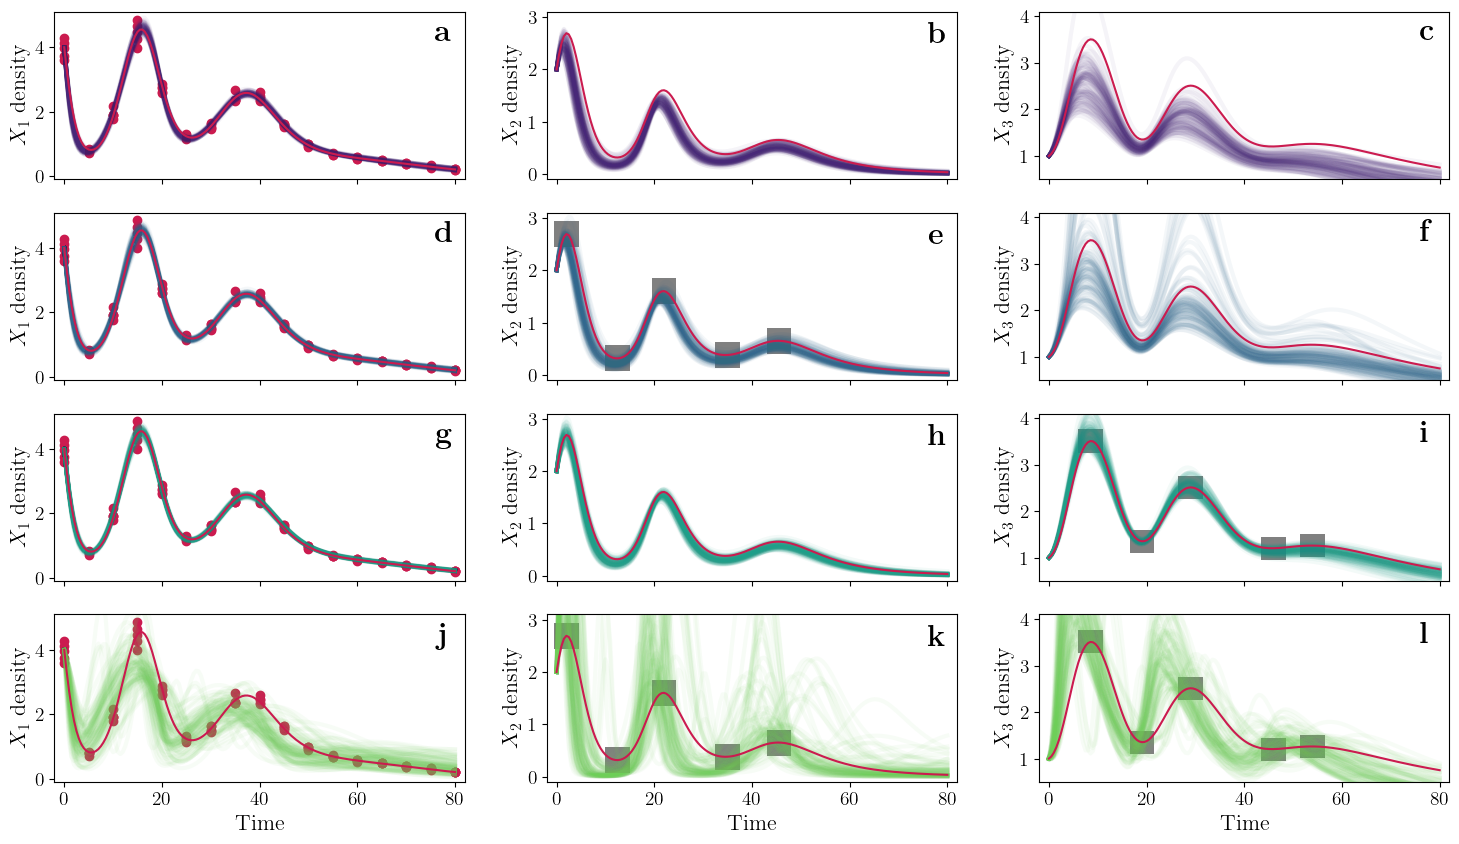

In [81]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(18,10), sharex=True)

# for i in range(dfParams.shape[0]):
for i in range(100):
    axs[0,0].plot(t, X1_I[i], lw=3, color=palette[0], alpha=0.05)
    axs[0,1].plot(t, X2_I[i], lw=3, color=palette[0], alpha=0.05)
    axs[0,2].plot(t, X3_I[i], lw=3, color=palette[0], alpha=0.05)

# for i in range(dfParams.shape[0]):
for i in range(100):
    axs[1,0].plot(t, X1_II[i], lw=3, color=palette[2], alpha=0.05)
    axs[1,1].plot(t, X2_II[i], lw=3, color=palette[2], alpha=0.05)
    axs[1,2].plot(t, X3_II[i], lw=3, color=palette[2], alpha=0.05)

# for i in range(dfParams.shape[0]):
for i in range(100):
    axs[2,0].plot(t, X1_III[i], lw=3, color=palette[4], alpha=0.05)
    axs[2,1].plot(t, X2_III[i], lw=3, color=palette[4], alpha=0.05)
    axs[2,2].plot(t, X3_III[i], lw=3, color=palette[4], alpha=0.05)

# for i in range(dfParams.shape[0]):
for i in range(100):
    axs[3,0].plot(t, X1_IV[i], lw=3, color=palette[6], alpha=0.05)
    axs[3,1].plot(t, X2_IV[i], lw=3, color=palette[6], alpha=0.05)
    axs[3,2].plot(t, X3_IV[i], lw=3, color=palette[6], alpha=0.05)

axs[0,0].scatter(x=dfData['Time'], y=dfData['X1'], color=palette_2[1], marker="o")
axs[1,0].scatter(x=dfData['Time'], y=dfData['X1'], color=palette_2[1], marker="o")
axs[2,0].scatter(x=dfData['Time'], y=dfData['X1'], color=palette_2[1], marker="o")
axs[3,0].scatter(x=dfData['Time'], y=dfData['X1'], color=palette_2[1], marker="o")

timeWindow = 5
valueWindow = 0.5

for i in range(len(dfQual_x2['Time'])):
    rect = plt.Rectangle((dfQual_x2['Time'].values[i]- timeWindow/2, dfQual_x2['X2'].values[i] - valueWindow/2),
                         timeWindow, valueWindow, fc='gray')
    axs[1,1].add_patch(rect)
    rect1 = plt.Rectangle((dfQual_x2['Time'].values[i]- timeWindow/2, dfQual_x2['X2'].values[i] - valueWindow/2),
                         timeWindow, valueWindow, fc='gray')
    axs[3,1].add_patch(rect1)
    
for i in range(len(dfQual_x3['Time'])):
    rect = plt.Rectangle((dfQual_x3['Time'].values[i]- timeWindow/2, dfQual_x3['X3'].values[i] - valueWindow/2),
                         timeWindow, valueWindow, fc='gray')
    axs[2,2].add_patch(rect)
    rect1 = plt.Rectangle((dfQual_x3['Time'].values[i]- timeWindow/2, dfQual_x3['X3'].values[i] - valueWindow/2),
                         timeWindow, valueWindow, fc='gray')
    axs[3,2].add_patch(rect1)

axs[0,0].plot(t, X1_g, lw=1.5, color=palette_2[1])
axs[0,1].plot(t, X2_g, lw=1.5, color=palette_2[1])
axs[0,2].plot(t, X3_g, lw=1.5, color=palette_2[1])

axs[1,0].plot(t, X1_g, lw=1.5, color=palette_2[1])
axs[1,1].plot(t, X2_g, lw=1.5, color=palette_2[1])
axs[1,2].plot(t, X3_g, lw=1.5, color=palette_2[1])

axs[2,0].plot(t, X1_g, lw=1.5, color=palette_2[1])
axs[2,1].plot(t, X2_g, lw=1.5, color=palette_2[1])
axs[2,2].plot(t, X3_g, lw=1.5, color=palette_2[1])

axs[3,0].plot(t, X1_g, lw=1.5, color=palette_2[1])
axs[3,1].plot(t, X2_g, lw=1.5, color=palette_2[1])
axs[3,2].plot(t, X3_g, lw=1.5, color=palette_2[1])

axs[0,0].set_ylabel('$X_1$ density')
axs[0,1].set_ylabel('$X_2$ density')
axs[0,2].set_ylabel('$X_3$ density')

axs[1,0].set_ylabel('$X_1$ density')
axs[1,1].set_ylabel('$X_2$ density')
axs[1,2].set_ylabel('$X_3$ density')

axs[2,0].set_ylabel('$X_1$ density')
axs[2,1].set_ylabel('$X_2$ density')
axs[2,2].set_ylabel('$X_3$ density')

axs[3,0].set_ylabel('$X_1$ density')
axs[3,1].set_ylabel('$X_2$ density')
axs[3,2].set_ylabel('$X_3$ density')

axs[3,0].set_xlabel('Time')
axs[3,1].set_xlabel('Time')
axs[3,2].set_xlabel('Time')

axs[0,0].text(76, 4.2, r'\textbf{a}', fontsize=22)
axs[0,1].text(76, 2.5, r'\textbf{b}', fontsize=22)
axs[0,2].text(76, 3.5, r'\textbf{c}', fontsize=22)
axs[1,0].text(76, 4.2, r'\textbf{d}', fontsize=22)
axs[1,1].text(76, 2.5, r'\textbf{e}', fontsize=22)
axs[1,2].text(76, 3.5, r'\textbf{f}', fontsize=22)
axs[2,0].text(76, 4.2, r'\textbf{g}', fontsize=22)
axs[2,1].text(76, 2.5, r'\textbf{h}', fontsize=22)
axs[2,2].text(76, 3.5, r'\textbf{i}', fontsize=22)
axs[3,0].text(76, 4.2, r'\textbf{j}', fontsize=22)
axs[3,1].text(76, 2.5, r'\textbf{k}', fontsize=22)
axs[3,2].text(76, 3.5, r'\textbf{l}', fontsize=22)

# axs[0,0].set_title(r'\textbf{a}', loc='left')
# axs[0,1].set_title(r'\textbf{b}', loc='left')
# axs[0,2].set_title(r'\textbf{c}', loc='left')
# axs[1,0].set_title(r'\textbf{d}', loc='left')
# axs[1,1].set_title(r'\textbf{e}', loc='left')
# axs[1,2].set_title(r'\textbf{f}', loc='left')
# axs[2,0].set_title(r'\textbf{g}', loc='left')
# axs[2,1].set_title(r'\textbf{h}', loc='left')
# axs[2,2].set_title(r'\textbf{i}', loc='left')
# axs[3,0].set_title(r'\textbf{j}', loc='left')
# axs[3,1].set_title(r'\textbf{k}', loc='left')
# axs[3,2].set_title(r'\textbf{l}', loc='left')

for i in range(4):
    axs[i,0].set_ylim((-0.1,5.1))
    axs[i,1].set_ylim((-0.1,3.1))
    axs[i,2].set_ylim((0.5,4.1))

# plt.setp(axs, xlim=(-2,82), ylim=(-0.1,5.1))
plt.setp(axs, xlim=(-2,82))

# plt.savefig("cycleLV_graphs.svg", transparent=True)
# plt.savefig("cycleLV_graphs.pdf")

plt.show()

In [76]:
dfParams_quant['Strategy'] = 'I'
dfParams_x2['Strategy'] = 'II'
dfParams_x3['Strategy'] = 'III'
dfParams_x2x3['Strategy'] = 'IV'

In [77]:
dfParams_all = pd.concat([dfParams_quant, dfParams_x2, dfParams_x3, dfParams_x2x3])
dfParams_all_cycle = dfParams_all.copy()

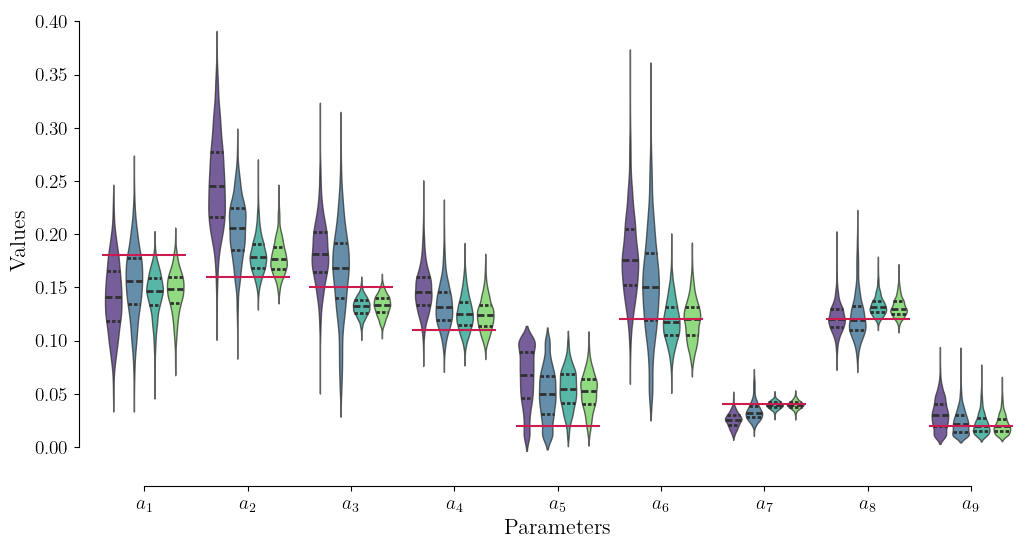

In [78]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12,6), facecolor='white')

colors = [palette[0], palette[2], palette[4], palette[6]]

axs = sns.violinplot(data=dfParams_all, x='Parameters', y='Values', hue='Strategy',
               palette=colors, alpha=0.75, linewidth=1.0, density_norm="count", gap=0.2,
               inner="quart", saturation=1, inner_kws=dict(linewidth=2))

# sns.pointplot(data=dfParams_ground, x='Parameters', y='Values', label='Ground truth',
#               color=palette_2[1], linestyle="none", marker="_", markersize=20, markeredgewidth=1.5)

sns.pointplot(data=dfParams_ground, x='Parameters', y='Values', #label='Ground truth',
              color=palette_2[1], linestyle="none", marker="_", markersize=60, markeredgewidth=1.5)

# axs.set_xticklabels(axs.get_yxticks(), size = 15)

sns.despine(offset=10, trim=True);

plt.legend([],[], frameon=False)

plt.savefig("cycleLV_boots.svg", transparent=True)
# plt.savefig("cycleLV_boots.pdf")

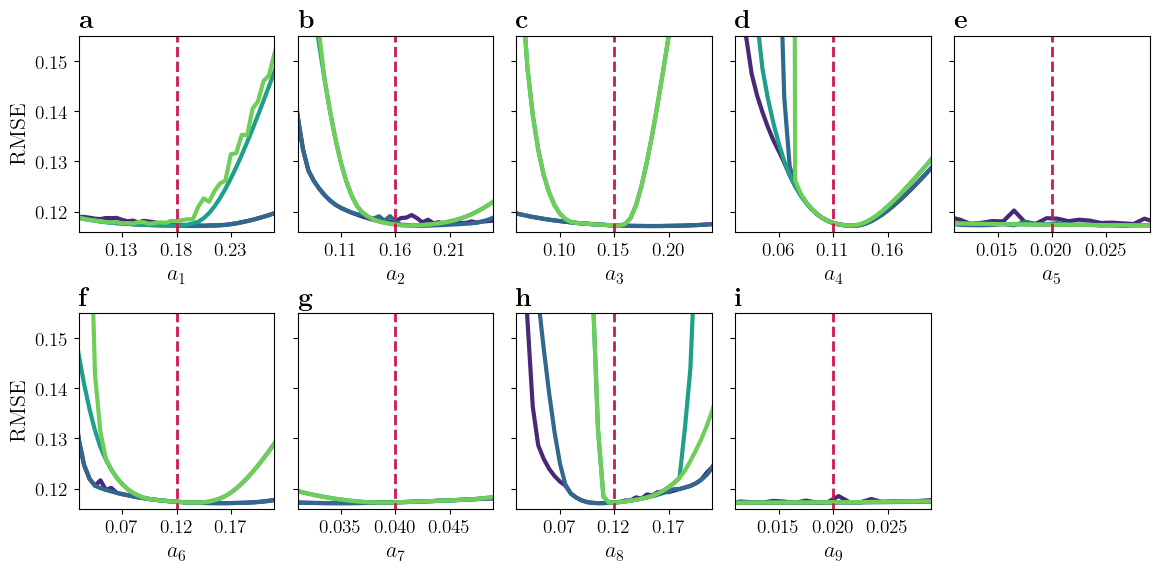

In [82]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12,6), sharey=True)

axs[0,0].plot(df_a1_quant['$a_1$'], df_a1_quant['RMSE'], lw=3, color=palette[0])
axs[0,0].plot(df_a1_x2['$a_1$'], df_a1_x2['RMSE'], lw=3, color=palette[2])
axs[0,0].plot(df_a1_x3['$a_1$'], df_a1_x3['RMSE'], lw=3, color=palette[4])
axs[0,0].plot(df_a1_x2x3['$a_1$'], df_a1_x2x3['RMSE'], lw=3, color=palette[6])
axs[0,0].vlines(dfGroundPars['$a_1$'], ymin=0.0, ymax=1.0, colors=palette_2[1], linestyles='dashed', lw=2)
axs[0,0].set_xlabel('$a_1$')
# axs[0,0].set_xlim((0.055,0.305))
axs[0,0].set_xlim((0.09, 0.27))
axs[0,0].set_xticks([0.13, 0.18, 0.23])
# axs[0,0].set_ylim((0.116,0.15))


axs[0,1].plot(df_a2_quant['$a_2$'], df_a2_quant['RMSE'], lw=3, color=palette[0])
axs[0,1].plot(df_a2_x2['$a_2$'], df_a2_x2['RMSE'], lw=3, color=palette[2])
axs[0,1].plot(df_a2_x3['$a_2$'], df_a2_x3['RMSE'], lw=3, color=palette[4])
axs[0,1].plot(df_a2_x2x3['$a_2$'], df_a2_x2x3['RMSE'], lw=3, color=palette[6])
axs[0,1].vlines(dfGroundPars['$a_2$'], ymin=0.0, ymax=1.0, colors=palette_2[1], linestyles='dashed', lw=2)
axs[0,1].set_xlabel('$a_2$')
# axs[0,1].set_xlim((0.035,0.285))
axs[0,1].set_xlim((0.07, 0.25))
axs[0,1].set_xticks([0.11, 0.16, 0.21])
# axs[0,1].set_ylim((0.116,0.15))

axs[0,2].plot(df_a3_quant['$a_3$'], df_a3_quant['RMSE'], lw=3, color=palette[0])
axs[0,2].plot(df_a3_x2['$a_3$'], df_a3_x2['RMSE'], lw=3, color=palette[2])
axs[0,2].plot(df_a3_x3['$a_3$'], df_a3_x3['RMSE'], lw=3, color=palette[4])
axs[0,2].plot(df_a3_x2x3['$a_3$'], df_a3_x2x3['RMSE'], lw=3, color=palette[6])
axs[0,2].vlines(dfGroundPars['$a_3$'], ymin=0.0, ymax=1.0, colors=palette_2[1], linestyles='dashed', lw=2)
axs[0,2].set_xlabel('$a_3$')
# axs[0,2].set_xlim((0.025,0.275))
axs[0,2].set_xlim((0.06, 0.24))
axs[0,2].set_xticks([0.10, 0.15, 0.20])
# axs[0,2].set_ylim((0.116,0.15))

axs[0,3].plot(df_a4_quant['$a_4$'], df_a4_quant['RMSE'], lw=3, color=palette[0])
axs[0,3].plot(df_a4_x2['$a_4$'], df_a4_x2['RMSE'], lw=3, color=palette[2])
axs[0,3].plot(df_a4_x3['$a_4$'], df_a4_x3['RMSE'], lw=3, color=palette[4])
axs[0,3].plot(df_a4_x2x3['$a_4$'], df_a4_x2x3['RMSE'], lw=3, color=palette[6])
axs[0,3].vlines(dfGroundPars['$a_4$'], ymin=0.0, ymax=1.0, colors=palette_2[1], linestyles='dashed', lw=2)
axs[0,3].set_xlabel('$a_4$')
# axs[0,3].set_xlim((0.01,0.210))
axs[0,3].set_xlim((0.02, 0.20))
axs[0,3].set_xticks([0.06, 0.11, 0.16])
# axs[0,3].set_ylim((0.116,0.15))

axs[0,4].plot(df_a5_quant['$a_5$'], df_a5_quant['RMSE'], lw=3, color=palette[0])
axs[0,4].plot(df_a5_x2['$a_5$'], df_a5_x2['RMSE'], lw=3, color=palette[2])
axs[0,4].plot(df_a5_x3['$a_5$'], df_a5_x3['RMSE'], lw=3, color=palette[4])
axs[0,4].plot(df_a5_x2x3['$a_5$'], df_a5_x2x3['RMSE'], lw=3, color=palette[6])
axs[0,4].vlines(dfGroundPars['$a_5$'], ymin=0.0, ymax=1.0, colors=palette_2[1], linestyles='dashed', lw=2)
axs[0,4].set_xlabel('$a_5$')
# axs[0,4].set_xlim((0.0075,0.0325))
axs[0,4].set_xlim((0.011, 0.029))
axs[0,4].set_xticks([0.015, 0.020, 0.025])
# axs[0,4].set_ylim((0.116,0.15))

axs[1,0].plot(df_a6_quant['$a_6$'], df_a6_quant['RMSE'], lw=3, color=palette[0])
axs[1,0].plot(df_a6_x2['$a_6$'], df_a6_x2['RMSE'], lw=3, color=palette[2])
axs[1,0].plot(df_a6_x3['$a_6$'], df_a6_x3['RMSE'], lw=3, color=palette[4])
axs[1,0].plot(df_a6_x2x3['$a_6$'], df_a6_x2x3['RMSE'], lw=3, color=palette[6])
axs[1,0].vlines(dfGroundPars['$a_6$'], ymin=0.0, ymax=1.0, colors=palette_2[1], linestyles='dashed', lw=2)
axs[1,0].set_xlabel('$a_6$')
# axs[1,0].set_xlim((0.02,0.220))
axs[1,0].set_xlim((0.03, 0.21))
axs[1,0].set_xticks([0.07, 0.12, 0.17])
# axs[1,0].set_ylim((0.116,0.15))

axs[1,1].plot(df_a7_quant['$a_7$'], df_a7_quant['RMSE'], lw=3, color=palette[0])
axs[1,1].plot(df_a7_x2['$a_7$'], df_a7_x2['RMSE'], lw=3, color=palette[2])
axs[1,1].plot(df_a7_x3['$a_7$'], df_a7_x3['RMSE'], lw=3, color=palette[4])
axs[1,1].plot(df_a7_x2x3['$a_7$'], df_a7_x2x3['RMSE'], lw=3, color=palette[6])
axs[1,1].vlines(dfGroundPars['$a_7$'], ymin=0.0, ymax=1.0, colors=palette_2[1], linestyles='dashed', lw=2)
axs[1,1].set_xlabel('$a_7$')
# axs[1,1].set_xlim((0.0275,0.0525))
axs[1,1].set_xlim((0.031, 0.049))
axs[1,1].set_xticks([0.035, 0.040, 0.045])
# axs[1,1].set_ylim((0.116,0.15))

axs[1,2].plot(df_a8_quant['$a_8$'], df_a8_quant['RMSE'], lw=3, color=palette[0])
axs[1,2].plot(df_a8_x2['$a_8$'], df_a8_x2['RMSE'], lw=3, color=palette[2])
axs[1,2].plot(df_a8_x3['$a_8$'], df_a8_x3['RMSE'], lw=3, color=palette[4])
axs[1,2].plot(df_a8_x2x3['$a_8$'], df_a8_x2x3['RMSE'], lw=3, color=palette[6])
axs[1,2].vlines(dfGroundPars['$a_8$'], ymin=0.0, ymax=1.0, colors=palette_2[1], linestyles='dashed', lw=2)
axs[1,2].set_xlabel('$a_8$')
# axs[1,2].set_xlim((0.02,0.220))
axs[1,2].set_xlim((0.03, 0.21))
axs[1,2].set_xticks([0.07, 0.12, 0.17])
# axs[1,2].set_ylim((0.116,0.15))

axs[1,3].plot(df_a9_quant['$a_9$'], df_a9_quant['RMSE'], lw=3, color=palette[0])
axs[1,3].plot(df_a9_x2['$a_9$'], df_a9_x2['RMSE'], lw=3, color=palette[2])
axs[1,3].plot(df_a9_x3['$a_9$'], df_a9_x3['RMSE'], lw=3, color=palette[4])
axs[1,3].plot(df_a9_x2x3['$a_9$'], df_a9_x2x3['RMSE'], lw=3, color=palette[6])
axs[1,3].vlines(dfGroundPars['$a_9$'], ymin=0.0, ymax=1.0, colors=palette_2[1], linestyles='dashed', lw=2)
axs[1,3].set_xlabel('$a_9$')
# axs[1,3].set_xlim((0.0075,0.0325))
axs[1,3].set_xlim((0.011, 0.029))
axs[1,3].set_xticks([0.015, 0.020, 0.025])
# axs[1,3].set_ylim((0.116,0.15))

# for i in range(3):
#     for j in range(3):
#         axs[i,j].set_ylabel('RMSE')

for i in range(2):
    axs[i,0].set_ylabel('RMSE')

axs[0,0].set_title(r'\textbf{a}', loc='left')
axs[0,1].set_title(r'\textbf{b}', loc='left')
axs[0,2].set_title(r'\textbf{c}', loc='left')
axs[0,3].set_title(r'\textbf{d}', loc='left')
axs[0,4].set_title(r'\textbf{e}', loc='left')
axs[1,0].set_title(r'\textbf{f}', loc='left')
axs[1,1].set_title(r'\textbf{g}', loc='left')
axs[1,2].set_title(r'\textbf{h}', loc='left')
axs[1,3].set_title(r'\textbf{i}', loc='left')

plt.setp(axs, ylim=(0.116,0.155))

for i in range(2):
    for j in range(5):
        axs[i,j].set_yticks(np.arange(0.12, 0.151, step=0.01))

plt.tight_layout(w_pad=0.5, h_pad=0.1)

fig.delaxes(axs[1,4])

plt.savefig("cycleLV_like.svg", transparent=True)
# plt.savefig("cycleLV_like.pdf")

plt.show()

# Lotka-Volterra equations (2-predators model)

\begin{align}
\dot X_1 &= a_0 X_1 - a_2 X_1 X_2 - a_3 X_1 X_3 \\
\dot X_2 &= a_4 X_1 X_2 - a_5 X_2 \\
\dot X_3 &= a_7 X_1 X_3 - a_9 X_3 \\
\end{align}

In [80]:
a0 = 0.45 # Reproduction rate of X1
a1 = 0.0 # Mortality rate of X1
a2 = 0.16 # Rate of predation of X2 on X1
a3 = -0.15 # Reproduction rate of X1 in presence of X3
a4 = 0.15 # Reproduction rate of X2 in presence of X1
a5 = 0.11 # Mortality rate of X2
a6 = 0.0 # Rate of predation of X3 on X2
a7 = -0.08 # Rate of predation of X1 on X3
a8 = 0.0 # Reproduction rate of X3 in presence of X2
a9 = 0.05 # Mortality rate of X3

In [81]:
dfGroundPars = pd.DataFrame([a0, a1, a2, a3, a4, a5, a6, a7, a8, a9]).T
dfGroundPars.columns = names

In [82]:
dfGroundPars

,$a_0$,$a_1$,$a_2$,$a_3$,$a_4$,$a_5$,$a_6$,$a_7$,$a_8$,$a_9$
0,0.45,0.0,0.16,-0.15,0.15,0.11,0.0,-0.08,0.0,0.05


# Generating data

In [83]:
a0 = dfGroundPars['$a_0$'][0]
a1 = dfGroundPars['$a_1$'][0]
a2 = dfGroundPars['$a_2$'][0]
a3 = dfGroundPars['$a_3$'][0]
a4 = dfGroundPars['$a_4$'][0]
a5 = dfGroundPars['$a_5$'][0]
a6 = dfGroundPars['$a_6$'][0]
a7 = dfGroundPars['$a_7$'][0]
a8 = dfGroundPars['$a_8$'][0]
a9 = dfGroundPars['$a_9$'][0]

In [84]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)
dt = t[1]-t[0]

In [85]:
sol = odeint(modelLV, Y0, t, args=(a0, a1, a2, a3, a4, a5, a6, a7, a8, a9))

In [86]:
X1_g = sol[:,0]
X2_g = sol[:,1]
X3_g = sol[:,2]

# Recovering parameters

In [87]:
dfParams_ground = dfGroundPars.drop(columns=['$a_1$', '$a_6$', '$a_8$']).melt(var_name='Parameters', value_name='Values')

In [88]:
dfData = pd.read_csv('2-predators/LVdata_noise.data', sep=' ')

## Quantitative X1

In [89]:
dfParams = pd.read_csv('2-predators/bestPars_quant.dat', sep=' ', names=parNames)

In [90]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)

X1_I, X2_I, X3_I = simulations(dfParams, Y0, t)

In [91]:
dfParams_quant = dfParams.drop(columns=['$a_1$', '$a_6$', '$a_8$', 'RMSE']).melt(var_name='Parameters', value_name='Values')

### Likelihood profiles

In [92]:
df_a0 = pd.read_csv('2-predators/profilesData/a0Profile.dat', sep=' ', names=parNames).filter(['$a_0$', 'RMSE'])
df_a2 = pd.read_csv('2-predators/profilesData/a2Profile.dat', sep=' ', names=parNames).filter(['$a_2$', 'RMSE'])
df_a3 = pd.read_csv('2-predators/profilesData/a3Profile.dat', sep=' ', names=parNames).filter(['$a_3$', 'RMSE'])
df_a4 = pd.read_csv('2-predators/profilesData/a4Profile.dat', sep=' ', names=parNames).filter(['$a_4$', 'RMSE'])
df_a5 = pd.read_csv('2-predators/profilesData/a5Profile.dat', sep=' ', names=parNames).filter(['$a_5$', 'RMSE'])
df_a7 = pd.read_csv('2-predators/profilesData/a7Profile.dat', sep=' ', names=parNames).filter(['$a_7$', 'RMSE'])
df_a9 = pd.read_csv('2-predators/profilesData/a9Profile.dat', sep=' ', names=parNames).filter(['$a_9$', 'RMSE'])

In [93]:
df_a0_quant = df_a0
df_a2_quant = df_a2
df_a3_quant = df_a3
df_a4_quant = df_a4
df_a5_quant = df_a5
df_a7_quant = df_a7
df_a9_quant = df_a9

## Qualitative X2

In [94]:
dfQual_x2 = pd.read_csv('2-predators/LVdata_qual_x2.data', sep=' ')

In [95]:
dfParams = pd.read_csv('2-predators/bestPars_x2.dat', sep=' ', names=parNames)

In [96]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)

X1_II, X2_II, X3_II = simulations(dfParams, Y0, t)

In [97]:
dfParams_x2 = dfParams.drop(columns=['$a_1$', '$a_6$', '$a_8$', 'RMSE']).melt(var_name='Parameters', value_name='Values')

### Likelihood profiles

In [98]:
df_a0 = pd.read_csv('2-predators/profilesData/a0Profile_x2.dat', sep=' ', names=parNames).filter(['$a_0$', 'RMSE'])
df_a2 = pd.read_csv('2-predators/profilesData/a2Profile_x2.dat', sep=' ', names=parNames).filter(['$a_2$', 'RMSE'])
df_a3 = pd.read_csv('2-predators/profilesData/a3Profile_x2.dat', sep=' ', names=parNames).filter(['$a_3$', 'RMSE'])
df_a4 = pd.read_csv('2-predators/profilesData/a4Profile_x2.dat', sep=' ', names=parNames).filter(['$a_4$', 'RMSE'])
df_a5 = pd.read_csv('2-predators/profilesData/a5Profile_x2.dat', sep=' ', names=parNames).filter(['$a_5$', 'RMSE'])
df_a7 = pd.read_csv('2-predators/profilesData/a7Profile_x2.dat', sep=' ', names=parNames).filter(['$a_7$', 'RMSE'])
df_a9 = pd.read_csv('2-predators/profilesData/a9Profile_x2.dat', sep=' ', names=parNames).filter(['$a_9$', 'RMSE'])

In [99]:
df_a0_x2 = df_a0
df_a2_x2 = df_a2
df_a3_x2 = df_a3
df_a4_x2 = df_a4
df_a5_x2 = df_a5
df_a7_x2 = df_a7
df_a9_x2 = df_a9

## Qualitative X3

In [100]:
dfQual_x3 = pd.read_csv('2-predators/LVdata_qual_x3.data', sep=' ')

In [101]:
dfParams = pd.read_csv('2-predators/bestPars_x3.dat', sep=' ', names=parNames)

In [102]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)

X1_III, X2_III, X3_III = simulations(dfParams, Y0, t)

In [103]:
dfParams_x3 = dfParams.drop(columns=['$a_1$', '$a_6$', '$a_8$', 'RMSE']).melt(var_name='Parameters', value_name='Values')

### Likelihood profiles

In [104]:
df_a0 = pd.read_csv('2-predators/profilesData/a0Profile_x3.dat', sep=' ', names=parNames).filter(['$a_0$', 'RMSE'])
df_a2 = pd.read_csv('2-predators/profilesData/a2Profile_x3.dat', sep=' ', names=parNames).filter(['$a_2$', 'RMSE'])
df_a3 = pd.read_csv('2-predators/profilesData/a3Profile_x3.dat', sep=' ', names=parNames).filter(['$a_3$', 'RMSE'])
df_a4 = pd.read_csv('2-predators/profilesData/a4Profile_x3.dat', sep=' ', names=parNames).filter(['$a_4$', 'RMSE'])
df_a5 = pd.read_csv('2-predators/profilesData/a5Profile_x3.dat', sep=' ', names=parNames).filter(['$a_5$', 'RMSE'])
df_a7 = pd.read_csv('2-predators/profilesData/a7Profile_x3.dat', sep=' ', names=parNames).filter(['$a_7$', 'RMSE'])
df_a9 = pd.read_csv('2-predators/profilesData/a9Profile_x3.dat', sep=' ', names=parNames).filter(['$a_9$', 'RMSE'])

In [105]:
df_a0_x3 = df_a0
df_a2_x3 = df_a2
df_a3_x3 = df_a3
df_a4_x3 = df_a4
df_a5_x3 = df_a5
df_a7_x3 = df_a7
df_a9_x3 = df_a9

## Qualitative X2 and X3

In [106]:
dfParams = pd.read_csv('2-predators/bestPars_x2x3.dat', sep=' ', names=parNames)

In [107]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)

X1_IV, X2_IV, X3_IV = simulations(dfParams, Y0, t)

In [108]:
dfParams_x2x3 = dfParams.drop(columns=['$a_1$', '$a_6$', '$a_8$', 'RMSE']).melt(var_name='Parameters', value_name='Values')

### Likelihood profiles

In [109]:
df_a0 = pd.read_csv('2-predators/profilesData/a0Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_0$', 'RMSE'])
df_a2 = pd.read_csv('2-predators/profilesData/a2Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_2$', 'RMSE'])
df_a3 = pd.read_csv('2-predators/profilesData/a3Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_3$', 'RMSE'])
df_a4 = pd.read_csv('2-predators/profilesData/a4Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_4$', 'RMSE'])
df_a5 = pd.read_csv('2-predators/profilesData/a5Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_5$', 'RMSE'])
df_a7 = pd.read_csv('2-predators/profilesData/a7Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_7$', 'RMSE'])
df_a9 = pd.read_csv('2-predators/profilesData/a9Profile_x2x3.dat', sep=' ', names=parNames).filter(['$a_9$', 'RMSE'])

In [110]:
df_a0_x2x3 = df_a0
df_a2_x2x3 = df_a2
df_a3_x2x3 = df_a3
df_a4_x2x3 = df_a4
df_a5_x2x3 = df_a5
df_a7_x2x3 = df_a7
df_a9_x2x3 = df_a9

## Comparative

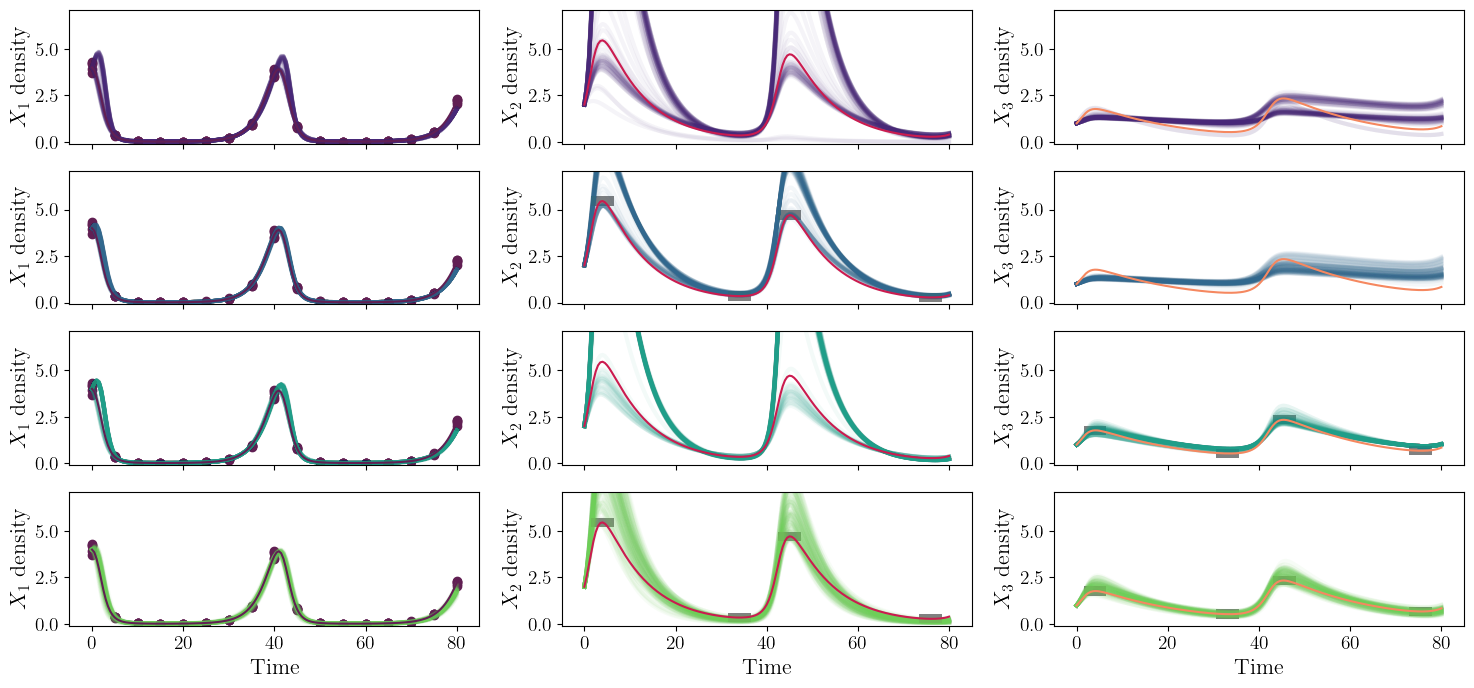

In [111]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(18,8), sharex=True)

# for i in range(dfParams.shape[0]):
for i in range(100):
    axs[0,0].plot(t, X1_I[i], lw=3, color=palette[0], alpha=0.05)
    axs[0,1].plot(t, X2_I[i], lw=3, color=palette[0], alpha=0.05)
    axs[0,2].plot(t, X3_I[i], lw=3, color=palette[0], alpha=0.05)

# for i in range(dfParams.shape[0]):
for i in range(100):
    axs[1,0].plot(t, X1_II[i], lw=3, color=palette[2], alpha=0.05)
    axs[1,1].plot(t, X2_II[i], lw=3, color=palette[2], alpha=0.05)
    axs[1,2].plot(t, X3_II[i], lw=3, color=palette[2], alpha=0.05)

# for i in range(dfParams.shape[0]):
for i in range(100):
    axs[2,0].plot(t, X1_III[i], lw=3, color=palette[4], alpha=0.05)
    axs[2,1].plot(t, X2_III[i], lw=3, color=palette[4], alpha=0.05)
    axs[2,2].plot(t, X3_III[i], lw=3, color=palette[4], alpha=0.05)

# for i in range(dfParams.shape[0]):
for i in range(100):
    axs[3,0].plot(t, X1_IV[i], lw=3, color=palette[6], alpha=0.05)
    axs[3,1].plot(t, X2_IV[i], lw=3, color=palette[6], alpha=0.05)
    axs[3,2].plot(t, X3_IV[i], lw=3, color=palette[6], alpha=0.05)

axs[0,0].scatter(x=dfData['Time'], y=dfData['X1'], color=palette_2[0])
axs[1,0].scatter(x=dfData['Time'], y=dfData['X1'], color=palette_2[0])
axs[2,0].scatter(x=dfData['Time'], y=dfData['X1'], color=palette_2[0])
axs[3,0].scatter(x=dfData['Time'], y=dfData['X1'], color=palette_2[0])

timeWindow = 5
valueWindow = 0.5

for i in range(len(dfQual_x2['Time'])):
    rect = plt.Rectangle((dfQual_x2['Time'].values[i]- timeWindow/2, dfQual_x2['X2'].values[i] - valueWindow/2),
                         timeWindow, valueWindow, fc='gray')
    axs[1,1].add_patch(rect)
    rect1 = plt.Rectangle((dfQual_x2['Time'].values[i]- timeWindow/2, dfQual_x2['X2'].values[i] - valueWindow/2),
                         timeWindow, valueWindow, fc='gray')
    axs[3,1].add_patch(rect1)
    
for i in range(len(dfQual_x3['Time'])):
    rect = plt.Rectangle((dfQual_x3['Time'].values[i]- timeWindow/2, dfQual_x3['X3'].values[i] - valueWindow/2),
                         timeWindow, valueWindow, fc='gray')
    axs[2,2].add_patch(rect)
    rect1 = plt.Rectangle((dfQual_x3['Time'].values[i]- timeWindow/2, dfQual_x3['X3'].values[i] - valueWindow/2),
                         timeWindow, valueWindow, fc='gray')
    axs[3,2].add_patch(rect1)

axs[0,0].plot(t, X1_g, lw=1.5, color=palette_2[0])
axs[0,1].plot(t, X2_g, lw=1.5, color=palette_2[1])
axs[0,2].plot(t, X3_g, lw=1.5, color=palette_2[2])

axs[1,0].plot(t, X1_g, lw=1.5, color=palette_2[0])
axs[1,1].plot(t, X2_g, lw=1.5, color=palette_2[1])
axs[1,2].plot(t, X3_g, lw=1.5, color=palette_2[2])

axs[2,0].plot(t, X1_g, lw=1.5, color=palette_2[0])
axs[2,1].plot(t, X2_g, lw=1.5, color=palette_2[1])
axs[2,2].plot(t, X3_g, lw=1.5, color=palette_2[2])

axs[3,0].plot(t, X1_g, lw=1.5, color=palette_2[0])
axs[3,1].plot(t, X2_g, lw=1.5, color=palette_2[1])
axs[3,2].plot(t, X3_g, lw=1.5, color=palette_2[2])

axs[0,0].set_ylabel('$X_1$ density')
axs[0,1].set_ylabel('$X_2$ density')
axs[0,2].set_ylabel('$X_3$ density')

axs[1,0].set_ylabel('$X_1$ density')
axs[1,1].set_ylabel('$X_2$ density')
axs[1,2].set_ylabel('$X_3$ density')

axs[2,0].set_ylabel('$X_1$ density')
axs[2,1].set_ylabel('$X_2$ density')
axs[2,2].set_ylabel('$X_3$ density')

axs[3,0].set_ylabel('$X_1$ density')
axs[3,1].set_ylabel('$X_2$ density')
axs[3,2].set_ylabel('$X_3$ density')

axs[3,0].set_xlabel('Time')
axs[3,1].set_xlabel('Time')
axs[3,2].set_xlabel('Time')

plt.setp(axs, xlim=(-5,85), ylim=(-0.1,7.1))

plt.savefig("2predLV_graphs.svg", transparent=True)

plt.show()

In [112]:
dfParams_quant['Strategy'] = 'I'
dfParams_x2['Strategy'] = 'II'
dfParams_x3['Strategy'] = 'III'
dfParams_x2x3['Strategy'] = 'IV'

In [113]:
dfParams_all = pd.concat([dfParams_quant, dfParams_x2, dfParams_x3, dfParams_x2x3])

In [114]:
dfParams_all['Values'] = abs(dfParams_all['Values'])
dfParams_ground['Values'] = abs(dfParams_ground['Values'])

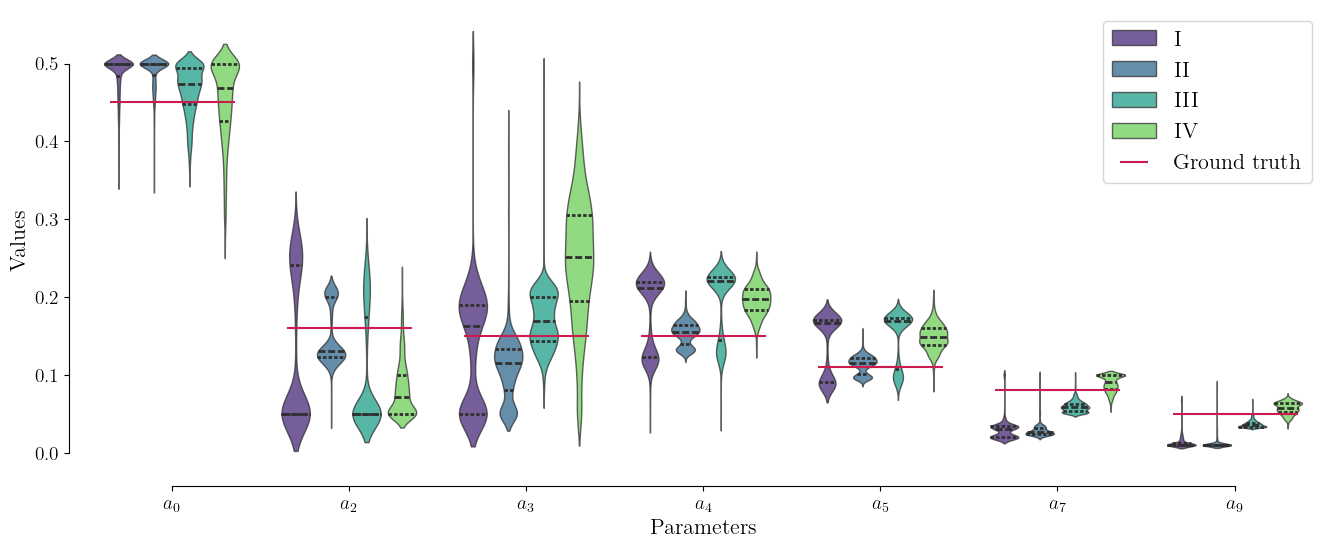

In [115]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(16,6))

colors = [palette[0], palette[2], palette[4], palette[6]]

sns.violinplot(data=dfParams_all, x='Parameters', y='Values', hue='Strategy',
               palette=colors, alpha=0.75, linewidth=1, density_norm="count", gap=0.2,
               inner="quart", saturation=1, inner_kws=dict(linewidth=2))

sns.pointplot(data=dfParams_ground, x='Parameters', y='Values', label='Ground truth',
              color=palette_2[1], linestyle="none", marker="_", markersize=20, markeredgewidth=1.5)

sns.pointplot(data=dfParams_ground, x='Parameters', y='Values', #label='Ground truth',
              color=palette_2[1], linestyle="none", marker="_", markersize=90, markeredgewidth=1.5)

sns.despine(offset=10, trim=True);

plt.savefig("2predLV_boots.svg", transparent=True)

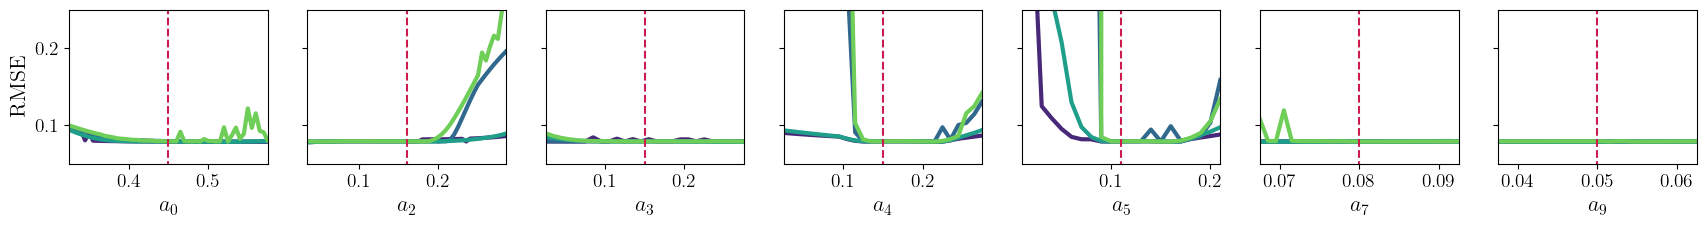

In [116]:
fig, axs = plt.subplots(nrows=1, ncols=7, figsize=(21,2), sharey=True, facecolor='white')

axs[0].plot(df_a0_quant['$a_0$'], df_a0_quant['RMSE'], lw=3, color=palette[0])
axs[0].plot(df_a0_x2['$a_0$'], df_a0_x2['RMSE'], lw=3, color=palette[2])
axs[0].plot(df_a0_x3['$a_0$'], df_a0_x3['RMSE'], lw=3, color=palette[4])
axs[0].plot(df_a0_x2x3['$a_0$'], df_a0_x2x3['RMSE'], lw=3, color=palette[6])
axs[0].vlines(dfGroundPars['$a_0$'], ymin=0.0, ymax=1.0, colors=palette_2[1], linestyles='dashed')
axs[0].set_xlabel('$a_0$')
axs[0].set_ylabel('RMSE')
axs[0].set_xlim((0.325,0.575))

axs[1].plot(df_a2_quant['$a_2$'], df_a2_quant['RMSE'], lw=3, color=palette[0])
axs[1].plot(df_a2_x2['$a_2$'], df_a2_x2['RMSE'], lw=3, color=palette[2])
axs[1].plot(df_a2_x3['$a_2$'], df_a2_x3['RMSE'], lw=3, color=palette[4])
axs[1].plot(df_a2_x2x3['$a_2$'], df_a2_x2x3['RMSE'], lw=3, color=palette[6])
axs[1].vlines(dfGroundPars['$a_2$'], ymin=0.0, ymax=1.0, colors=palette_2[1], linestyles='dashed')
axs[1].set_xlabel('$a_2$')
axs[1].set_xlim((0.035,0.285))

axs[2].plot(-df_a3_quant['$a_3$'], df_a3_quant['RMSE'], lw=3, color=palette[0])
axs[2].plot(-df_a3_x2['$a_3$'], df_a3_x2['RMSE'], lw=3, color=palette[2])
axs[2].plot(-df_a3_x3['$a_3$'], df_a3_x3['RMSE'], lw=3, color=palette[4])
axs[2].plot(-df_a3_x2x3['$a_3$'], df_a3_x2x3['RMSE'], lw=3, color=palette[6])
axs[2].vlines(-dfGroundPars['$a_3$'], ymin=0.0, ymax=1.0, colors=palette_2[1], linestyles='dashed')
axs[2].set_xlabel('$a_3$')
axs[2].set_xlim((0.025,0.275))

axs[3].plot(df_a4_quant['$a_4$'], df_a4_quant['RMSE'], lw=3, color=palette[0])
axs[3].plot(df_a4_x2['$a_4$'], df_a4_x2['RMSE'], lw=3, color=palette[2])
axs[3].plot(df_a4_x3['$a_4$'], df_a4_x3['RMSE'], lw=3, color=palette[4])
axs[3].plot(df_a4_x2x3['$a_4$'], df_a4_x2x3['RMSE'], lw=3, color=palette[6])
axs[3].vlines(dfGroundPars['$a_4$'], ymin=0.0, ymax=1.0, colors=palette_2[1], linestyles='dashed')
axs[3].set_xlabel('$a_4$')
axs[3].set_xlim((0.025,0.275))

axs[4].plot(df_a5_quant['$a_5$'], df_a5_quant['RMSE'], lw=3, color=palette[0])
axs[4].plot(df_a5_x2['$a_5$'], df_a5_x2['RMSE'], lw=3, color=palette[2])
axs[4].plot(df_a5_x3['$a_5$'], df_a5_x3['RMSE'], lw=3, color=palette[4])
axs[4].plot(df_a5_x2x3['$a_5$'], df_a5_x2x3['RMSE'], lw=3, color=palette[6])
axs[4].vlines(dfGroundPars['$a_5$'], ymin=0.0, ymax=1.0, colors=palette_2[1], linestyles='dashed')
axs[4].set_xlabel('$a_5$')
axs[4].set_xlim((0.010,0.210))

axs[5].plot(-df_a7_quant['$a_7$'], df_a7_quant['RMSE'], lw=3, color=palette[0])
axs[5].plot(-df_a7_x2['$a_7$'], df_a7_x2['RMSE'], lw=3, color=palette[2])
axs[5].plot(-df_a7_x3['$a_7$'], df_a7_x3['RMSE'], lw=3, color=palette[4])
axs[5].plot(-df_a7_x2x3['$a_7$'], df_a7_x2x3['RMSE'], lw=3, color=palette[6])
axs[5].vlines(-dfGroundPars['$a_7$'], ymin=0.0, ymax=1.0, colors=palette_2[1], linestyles='dashed')
axs[5].set_xlabel('$a_7$')
axs[5].set_xlim((0.0675,0.0925))

axs[6].plot(df_a9_quant['$a_9$'], df_a9_quant['RMSE'], lw=3, color=palette[0])
axs[6].plot(df_a9_x2['$a_9$'], df_a9_x2['RMSE'], lw=3, color=palette[2])
axs[6].plot(df_a9_x3['$a_9$'], df_a9_x3['RMSE'], lw=3, color=palette[4])
axs[6].plot(df_a9_x2x3['$a_9$'], df_a9_x2x3['RMSE'], lw=3, color=palette[6])
axs[6].vlines(dfGroundPars['$a_9$'], ymin=0.0, ymax=1.0, colors=palette_2[1], linestyles='dashed')
axs[6].set_xlabel('$a_9$')
axs[6].set_xlim((0.0375,0.0625))

plt.setp(axs, ylim=(0.05,0.25))

plt.savefig("2predLV_like.svg", transparent=True)

plt.show()